In [ ]:
#Import pandas for importing data from a csv file
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Import csv data to a datframe
from google.colab import drive
drive.mount('/content/drive')
pthname = '/content/drive/My Drive/ds_salaries.csv'
data_frame=pd.read_csv(pthname)

#Exploratory analysis
data_frame.head()

Mounted at /content/drive


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


There are a total of 12 columns and 607 entries(data points) ranging from 0 to 606. The data type is either integer or objects. The colums indicate a persons work year, experience level, employmny type, job title, salary, salary currency, salary in usd, employee residence, remote ratio, company location and company size.




In [ ]:
data_frame.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


Some salaries are in different currencies and so the best way to go around that will be to look at the data corresponding to "salary_in_usd" for a standardized data set. We can see that the mean salary is 112297.87 with a standard deviation of 70,957.26. Moreover, the count for the colums is 607 implying that there is no missing data so we dont need to fill in any unentered data.

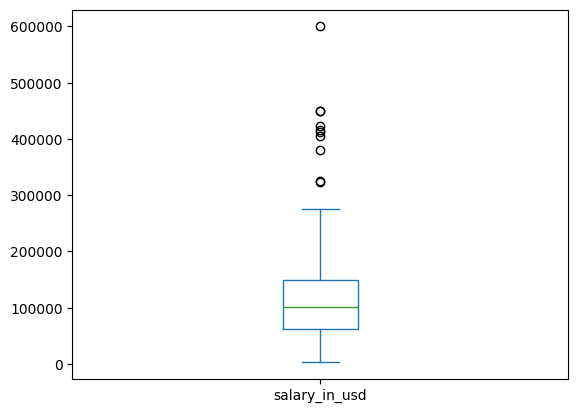

In [ ]:
data_frame['salary_in_usd'].plot.box()

#can get the IQR values
salaryQ1 = data_frame['salary_in_usd'].quantile(0.25)
salaryQ3 = data_frame['salary_in_usd'].quantile(0.75)

#remove the outliers
salaryOutliers = data_frame[(data_frame['salary_in_usd'] > salaryQ3 + 1.5*(salaryQ3-salaryQ1))]

data_frame = data_frame.drop(salaryOutliers.index)

From the boxplot, we can see that there are quite a few outliers in the salaries (in usd), around 300000 and higher. When training our data, we will want to remove these. Since the mean is greater than the median, the distribution of the salaries is right-skewed. This means that most salaries are below the mean of 112297.87.

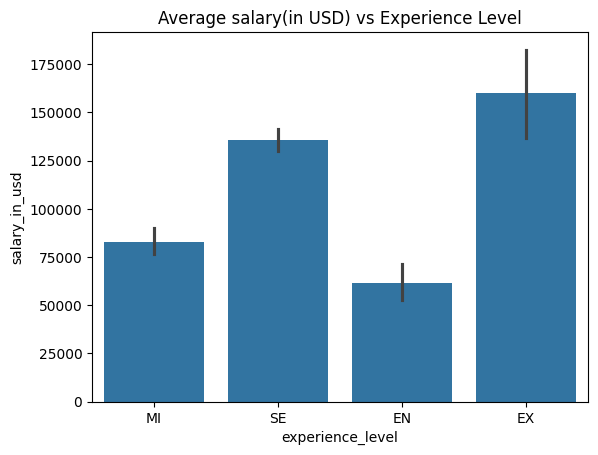

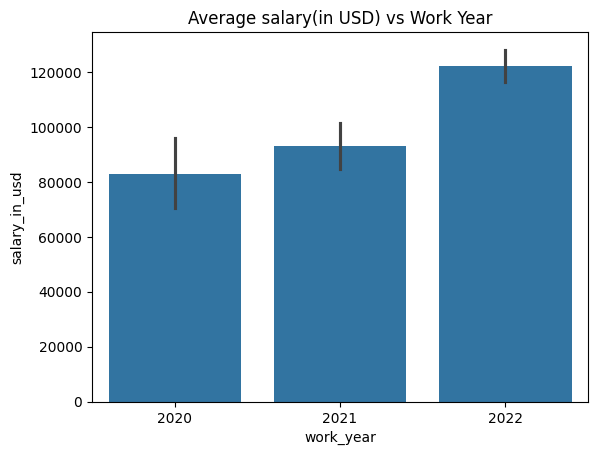

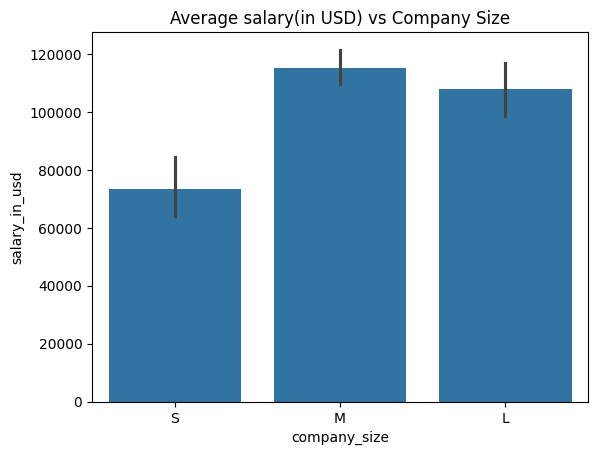

In [ ]:
#Comparing salary with experience level
sns.barplot(x='experience_level', y='salary_in_usd', data = data_frame, estimator = np.mean)
plt.title("Average salary(in USD) vs Experience Level")
plt.show()

#Comparing salary with work year
sns.barplot(x='work_year', y='salary_in_usd', data = data_frame, estimator = np.mean)
plt.title("Average salary(in USD) vs Work Year")
plt.show()

#Comparing salary with company size
sns.barplot(x='company_size', y="salary_in_usd", data = data_frame, estimator=np.mean, order = ['S','M','L'])
plt.title("Average salary(in USD) vs Company Size")
plt.show()




<Axes: xlabel='employee_residence', ylabel='salary_in_usd'>

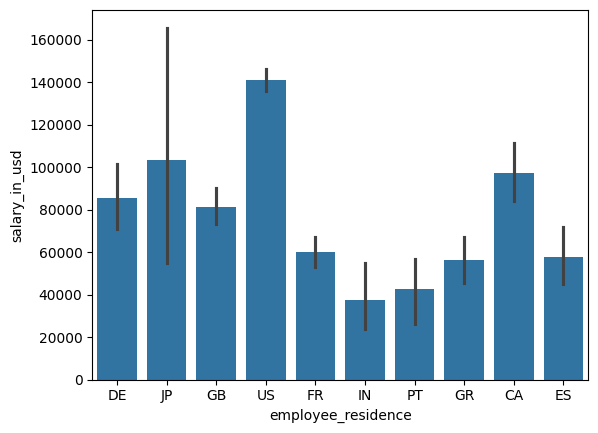

In [ ]:
#Plot top 10 places for employees and their avg salaries
t10_residence = data_frame["employee_residence"].value_counts().nlargest(10).index
sns.barplot(x='employee_residence', y="salary_in_usd",
            data=data_frame[data_frame['employee_residence'].isin(t10_residence)],
            estimator = np.mean)


#TO DO: Talk about avg salary vs Work Year && avg salary vs Company Size.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Create X and y data sets
X = data_frame[['experience_level', 'remote_ratio', 'company_size', 'job_title', 'company_location', 'employment_type']]
y = data_frame['salary_in_usd']

s_features = ['experience_level', 'company_size', 'job_title', 'company_location', 'employment_type']

#One hot encoding
X = pd.get_dummies(X, columns=s_features)

#scaling using Z score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X.to_numpy())
X = scaler.transform(X.to_numpy())

yScaler = StandardScaler()
yScaler.fit(y.to_numpy().reshape(-1, 1))
y = yScaler.transform(y.to_numpy().reshape(-1, 1)).reshape(1, -1)

X_train, X_test, y_train, y_test = train_test_split(X, y[0], test_size=0.25)



In [ ]:

#Using RFG since it is the best at predicting salaries
model = RandomForestRegressor()

param_grid = {
    'n_estimators': [130,140,150],
    'criterion': ["squared_error","absolute_error"],
    'max_depth': [11,13,15], #maximum depth of the tree
    'min_samples_split': [4,6,8], #minimum number of samples required to split an internal node
    'min_samples_leaf' : [4,6] #minimum number of samples required to be at a leaf node.
    }

grid_search = GridSearchCV(estimator = model, param_grid=param_grid, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameter: " , best_params)
print("Best Score: " , best_score)

Best Parameter:  {'criterion': 'absolute_error', 'max_depth': 11, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 130}
Best Score:  -0.5598412288353669


In [ ]:
best_model = RandomForestRegressor(n_estimators=130, max_depth=11, min_samples_split=4, min_samples_leaf=4, n_jobs=-1, criterion="absolute_error")
best_model.fit(X_train,y_train)

y_pred = best_model.predict(X_test)

test_mse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)

print("Test MSE: ", test_mse)
print("R2 score: ", r2)


Test MSE:  0.6151898898542428
R2 score:  0.5482183936987481


In [ ]:
#finally, save the model using pickle. Based on https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

import pickle
savedModelFile = '/content/drive/My Drive/best_model.sav'
pickle.dump(best_model, open(savedModelFile,'wb'))

In [ ]:
import math
for index in range(0,50):
  target = yScaler.inverse_transform([[y_test[index]]])[0][0]
  pred = yScaler.inverse_transform([best_model.predict([X_test[index]])])[0][0]
  absErr = np.abs(float(target)-float(pred))
  print("difference of: {:.2f}   \tfor Target vs Prediction: {:.2f}  \tvs {:.2f}".format(absErr,target,pred))

difference of: 7666.53   	for Target vs Prediction: 63831.00  	vs 56164.47
difference of: 32550.15   	for Target vs Prediction: 4000.00  	vs 36550.15
difference of: 41341.43   	for Target vs Prediction: 153000.00  	vs 111658.57
difference of: 27211.89   	for Target vs Prediction: 65438.00  	vs 92649.89
difference of: 5099.34   	for Target vs Prediction: 170000.00  	vs 175099.34
difference of: 11040.73   	for Target vs Prediction: 75774.00  	vs 64733.27
difference of: 39882.51   	for Target vs Prediction: 140400.00  	vs 180282.51
difference of: 14594.52   	for Target vs Prediction: 87738.00  	vs 102332.52
difference of: 19752.95   	for Target vs Prediction: 90320.00  	vs 110072.95
difference of: 46366.73   	for Target vs Prediction: 39263.00  	vs 85629.73
difference of: 39064.44   	for Target vs Prediction: 55000.00  	vs 94064.44
difference of: 1970.24   	for Target vs Prediction: 82528.00  	vs 80557.76
difference of: 55649.46   	for Target vs Prediction: 99360.00  	vs 155009.46
differe